In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [ ]:
train = pd.read_csv('test.csv')

# EDA + Feature Engineering

Сделаем признаки Group (вычленим группу из PassangerId) и разобъём признак Cabin на составляющие 

In [283]:
train['Group'] = train.PassengerId.str.split("_").str[0]
train['Deck'] = train.Cabin.str.split("/").str[0]
train['Num'] = train.Cabin.str.split("/").str[1]
train['Side'] = train.Cabin.str.split("/").str[2]


train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S


...и удалим ненужные признаки.

In [284]:
train = train.drop(columns="PassengerId")
train = train.drop(columns="Cabin")

## Encode'им категориальные признаки

Сначала посмотрим на Home.

<Axes: ylabel='HomePlanet'>

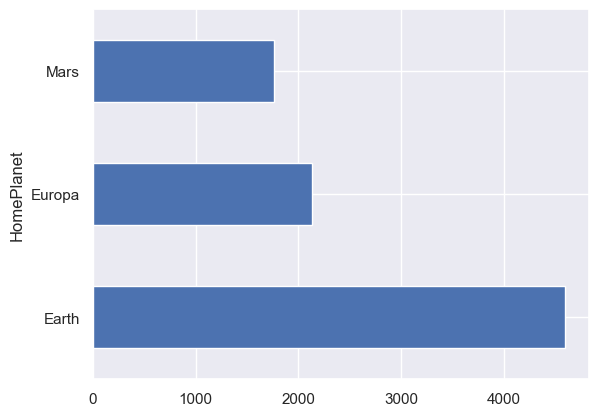

In [285]:
train.HomePlanet.value_counts().plot.barh()

Для кодирования используем count encoder

<Axes: ylabel='HomePlanet'>

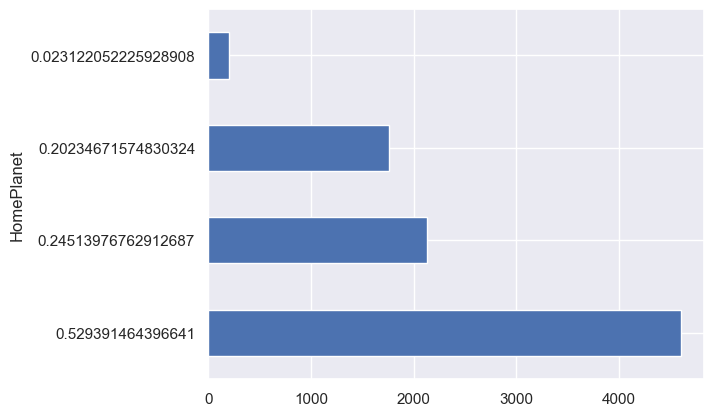

In [288]:
count_encoder = ce.CountEncoder(normalize=True)
train["HomePlanet"] = count_encoder.fit_transform(train['HomePlanet'], train['Transported'])

train["HomePlanet"].value_counts().plot.barh()

Теперь разберемся с Transported. Закодируем его Label Encoder'ом - благо в нем и так bool значения.

<Axes: ylabel='Transported'>

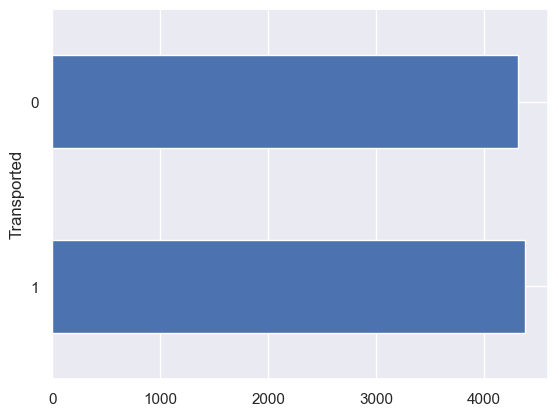

In [289]:
label_encoder = LabelEncoder()

train["Transported"] = label_encoder.fit_transform(train['Transported'])

train["Transported"].value_counts().plot.barh()

Теперь разберемся с VIP. Тут тоже поможет LabelEncoder.

<Axes: ylabel='VIP'>

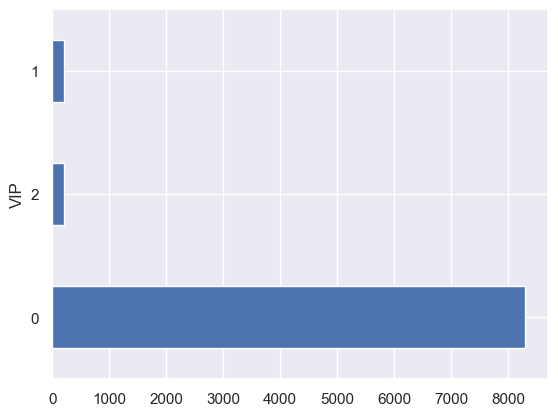

In [290]:
label_encoder = LabelEncoder()

train["VIP"] = label_encoder.fit_transform(train['VIP'])

train["VIP"].value_counts().plot.barh()

Теперь разбираемся с Deck, Side и Destination - тут снова Count Encoder.

<Axes: ylabel='Destination'>

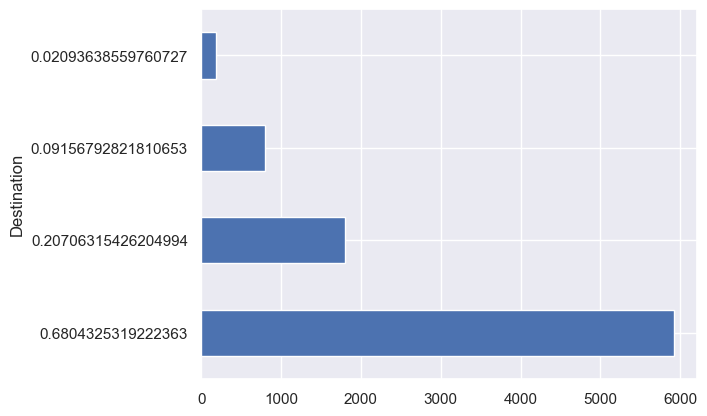

In [291]:
train["Deck"] = count_encoder.fit_transform(train['Deck'], train["Transported"])


train["Side"] = count_encoder.fit_transform(train['Side'], train["Transported"])
train["Destination"] = count_encoder.fit_transform(train['Destination'], train["Transported"])

train["Destination"].value_counts().plot.barh()

Преобразуем признаки RoomService, FoodCourt, ShoppingMall, Spa, VRDeck c помощью pd.cut в категориальные (по процентилям)

In [ ]:
labels = [0, 1, 2]  # Названия категорий

f = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
hypotesis = train.copy()
for e in f:
    hypotesis[e] = pd.cut(train[e], bins=([train[e].quantile(i) for i in [0, 0.75, 0.90]] + [10 ** 10]), right=False, labels=labels, duplicates="drop")
train = hypotesis

In [ ]:
labels = [0, 1, 2]  # Названия категорий

f = ["Age", "Age"]
hypotesis = train.copy()
for e in f:
    hypotesis[e] = pd.cut(train[e], bins=range(0, 85, 10), right=False, labels=range(0, 73, 10), duplicates="drop")
train = hypotesis

In [ ]:
train.to_csv('test.csv')